## Practical Lab 4 - Multivariate Linear and Polynomial Regression, and Evaluation using MAE and MAPE


In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE and MAPE.
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None.
        Print the MAE and MAPE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $y_{test} - y_{pred}$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('Percentage error $100*(y_{test} - y_{pred}) / y_{test}$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('Percentage error $100*(y_{test} - y_{pred}) / y_{test}$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    # Print MAE and MAPE
    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Test Dataset: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_test):.2%}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')
    print(f'Train Dataset: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_pred_train):.2%}')

    # Print the equation
    print('y = ', end='')
    if hasattr(model, 'named_steps'):
        for i, coef in enumerate(model.named_steps['linearregression'].coef_):
            print(f'{coef:.2f} * x_{i} + ', end='')
        print(f'{model.named_steps["linearregression"].intercept_:.2f}')
    else:
        for i, coef in enumerate(model.coef_):
            print(f'{coef:.2f} * x_{i} + ', end='')
        print(f'{model.intercept_:.2f}')
    
    fig.tight_layout()
    plt.show()


#### Step 1: Load and train dataset

In [16]:
# Load the dataset
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

# split into training and testing sets
traindata_x, testdata_x, traindata_y, testdata_y = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Run the multivariate linear regression 

In [17]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(traindata_x, traindata_y)
predict_traindata_y = linear_regression_model.predict(traindata_x)
predict_testdata_y = linear_regression_model.predict(testdata_x)


#### Step 3: Evaluate the linear regression model


Test Dataset: Mean Absolute Error: 42.79
Test Dataset: Mean Absolute Percentage Error: 37.50%
Train Dataset: Mean Absolute Error: 43.48
Train Dataset: Mean Absolute Percentage Error: 38.92%
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


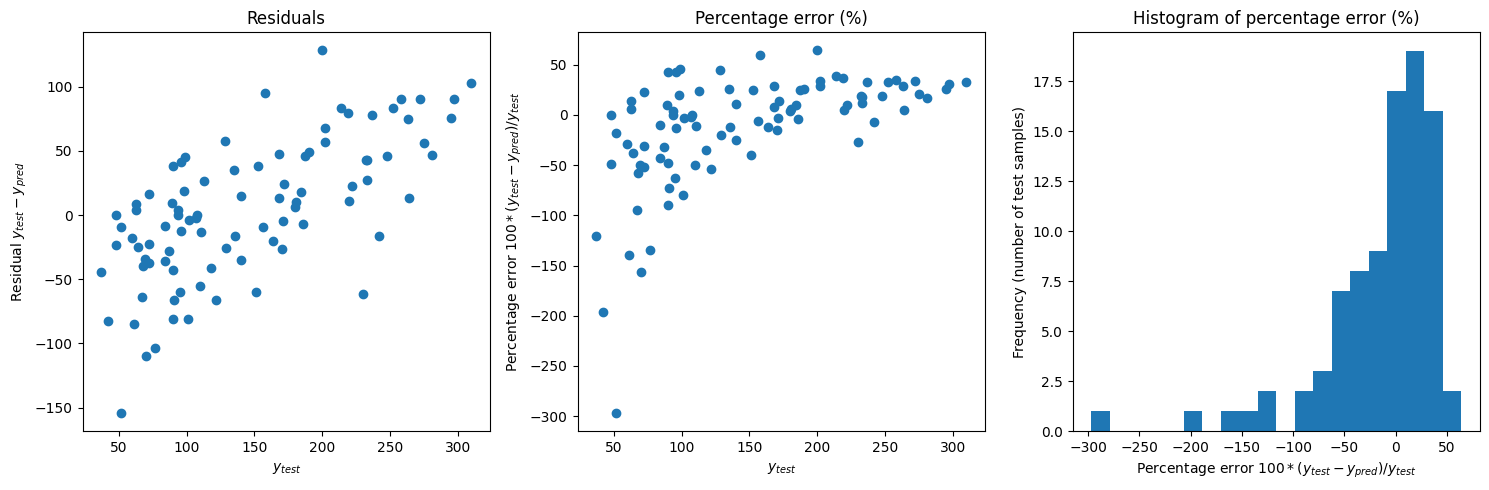

In [18]:

model_estimation(linear_regression_model, traindata_y, testdata_y, predict_traindata_y, predict_testdata_y)


#### Step 4: Run the multivariate polynomial regression 

In [19]:

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
traindata_x_poly = polynomial_features.fit_transform(traindata_x)
testdata_x_poly = polynomial_features.transform(testdata_x)

polynomial_model = LinearRegression()
polynomial_model.fit(traindata_x_poly, traindata_y)
predict_train_poly_y = polynomial_model.predict(traindata_x_poly)
predict_test_poly_y = polynomial_model.predict(testdata_x_poly)

#### Step 5: Evaluate the polynomial regression model

Test Dataset: Mean Absolute Error: 43.58
Test Dataset: Mean Absolute Percentage Error: 38.29%
Train Dataset: Mean Absolute Error: 39.14
Train Dataset: Mean Absolute Percentage Error: 34.39%
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_46 + -1.28 * x_47 + -5.05 * x_48 + -0.04 * x_49 + 0.11 * x_50 + 0.20 * x_51 + 0.37 * x_52 + 3.38 * x_53 + 0.03 * x_54 + 0.15

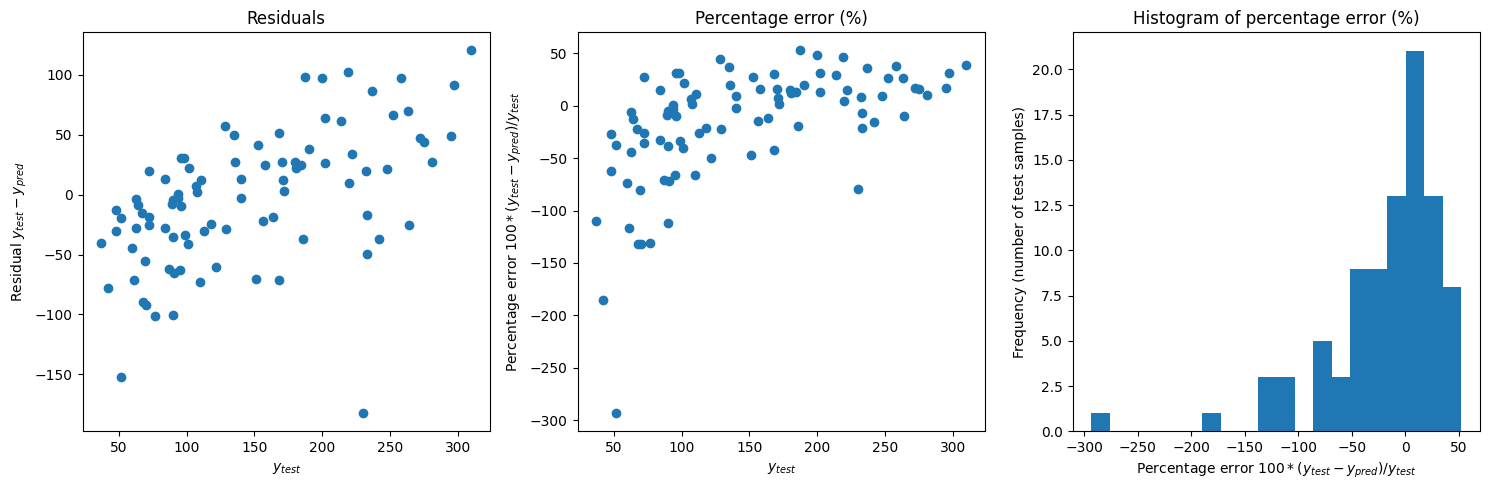

In [20]:
model_estimation(make_pipeline(polynomial_features, polynomial_model), traindata_y, testdata_y, predict_train_poly_y, predict_test_poly_y)



### 1. Number of Parameters in Linear and Polynomial Regression

- **Linear Regression**: 10 parameters (one for each feature)
- **Polynomial Regression**: 65 parameters (including original features, pairwise interactions, and squared terms)

**Explanation:**
- Linear Regression has one coefficient for each feature and an intercept.
- Polynomial Regression of degree 2 includes coefficients for each feature, all pairwise interactions, squared terms, and an intercept.



### 2. Model Selection for Deployment

When evaluating MAE and MAPE metrics, Polynomial Regression often exhibits lower error metrics than Linear Regression. However, Polynomial Regression is more complex and may be susceptible to overfitting. The choice of model depends on the specific deployment context:

- **For interpretability and simplicity**: Linear Regression is preferable.
- **For higher accuracy** (and if overfitting can be managed): Polynomial Regression is a better option.



### 3. Goodness-of-Fit Insights

- **Residuals Plot**: Ideally, residuals should be randomly distributed around zero to indicate a good fit.
- **Percentage Error Plot**: A tighter cluster around zero indicates better model performance.
- **Histogram of Percentage Errors**: A narrower spread suggests lower prediction errors across test samples.
